In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#read in excel raw data
fname = "/Users/leemc/Documents/GitHub/blood-vessel-diameter/Data/120pointsNormalized_10mM Glu.xls"
bv_df = pd.read_excel(fname)

#create column names and time labels
#Need to make sure that names+time labels are the same width as dataframe
labels = ['File loc', 'File name', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline']
x = len(bv_df.columns)
time = list(range(-3,x-9))
col_labels = labels + time
bv_df.columns = col_labels

#create smaller dataframe with data to graph
bv_reduced = bv_df.drop(columns=['File loc', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline'])
#bv_reduced['File name']
#print (bv_reduced)

In [2]:
#iterate through the file names and extract the pulse
pulse = []
line = []
for f in bv_reduced['File name']:
    p = re.findall('^[0-9]*-[0-9]*[a-z]*', f)
    p_to_str = ''.join(map(str, p))
    pulse.append(p_to_str)
    #print(p)
    l = f[-5]
    line.append(l)
bv_reduced['Pulse'] = pulse
bv_reduced['Line'] = line
#bv_reduced
#set pulse and file name as the hierarchical index
bv_reduced.set_index('Pulse', inplace=True)
bv_time = bv_reduced.drop(columns = ['File name', 'Line']).transpose()
bv_time = bv_reduced.drop(columns = 'File name')
pd.options.display.max_rows = 500
#bv_time.head()
bv_time
#bv_time.index.unique()

,-3,-2,-1,0,1,2,3,4,5,6,...,113,114,115,116,117,118,119,120,121,Line
Pulse,,,,,,,,,,,,,,,,,,,,,
080916-11,0.051528,-0.015108,-0.031842,0.071429,0.147959,0.158480,0.131670,0.092943,0.051528,0.060364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
080916-11,0.036836,-0.008007,-0.021725,0.070282,0.140360,0.123796,0.082768,0.023903,0.014538,-0.013812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
080916-11,0.013255,-0.021861,0.008920,0.052201,0.068254,0.058488,0.058842,-0.022372,-0.088262,-0.128760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
080916-11,0.036464,-0.038713,0.001917,-0.002154,-0.013765,-0.006825,-0.080494,-0.130435,-0.173766,-0.181635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
080916-11,0.042922,-0.031124,-0.012365,-0.010040,-0.073795,-0.076691,-0.115964,-0.198795,-0.250753,-0.262048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
080916-11,0.077447,-0.009865,-0.056008,-0.054871,-0.091519,-0.100155,-0.202852,-0.257939,-0.293179,-0.296361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
080916-11,0.120581,-0.049022,-0.059201,-0.098124,-0.121315,-0.204962,-0.285714,-0.650072,-0.900794,-0.729437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
081016-11,0.023236,-0.004979,-0.022989,-0.006687,-0.069138,-0.096107,-0.137799,-0.241353,-0.267513,-0.241353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
081016-11,0.019177,0.001620,-0.023343,-0.007385,-0.034742,-0.070708,-0.114078,-0.168071,-0.178672,-0.183498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


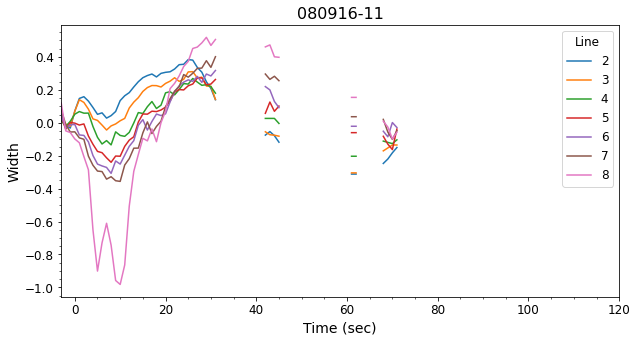

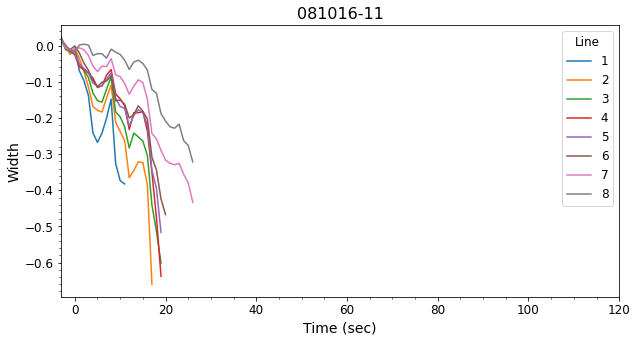

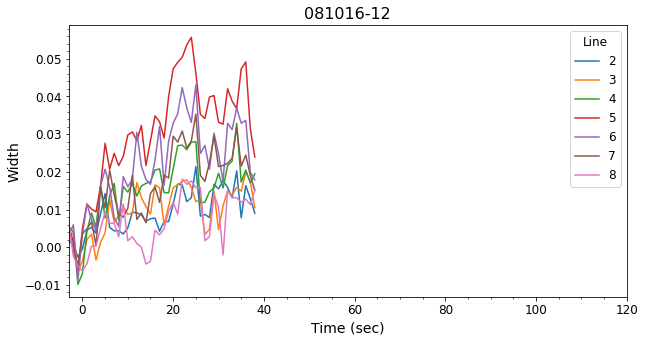

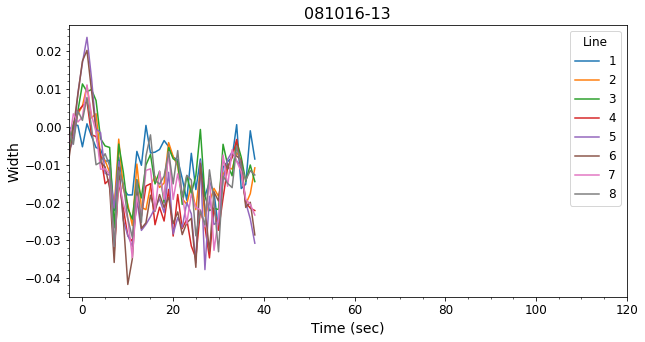

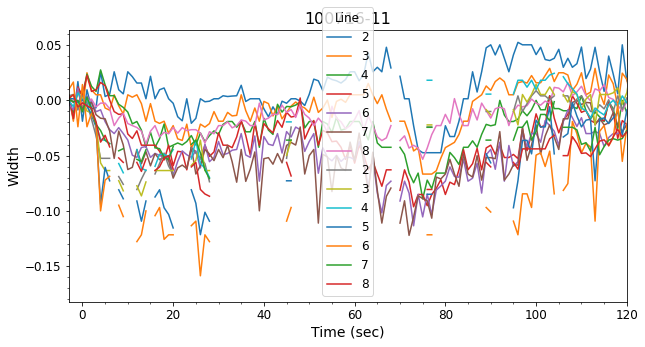

In [3]:
pulses = bv_time.index.unique()
for p in pulses:
    bv_subset = bv_time.loc[p]
    bv_subset.set_index('Line', inplace=True)
    bv_subset_trans = bv_subset.transpose()
    #print(bv_subset_trans)
    # plot
    bv_subset_trans.plot(figsize=(10,5), xlim=(-3,120), fontsize=12)
    plt.legend(fontsize='large', title='Line', title_fontsize=12)
    plt.title(label=p, fontsize=16)
    plt.minorticks_on()
    plt.xlabel('Time (sec)', fontsize=14)
    plt.ylabel('Width', fontsize=14)
    figname = p + '.png'
    #plt.savefig(figname)
    #print(figname)
    plt.show() 